# Introduction

## Data Description

**In this tutorial, we will work on data visualization of the Iris dataset.**

The Iris flower data set consists of 50 samples from each of three species of Iris Flowers — Iris Setosa, Iris Virginica and Iris Versicolor . The Iris flower data set was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper “The use of multiple measurements in taxonomic problems”.

[Image Source](https://medium.com/analytics-vidhya/exploratory-data-analysis-uni-variate-analysis-of-iris-data-set-690c87a5cd40)

![iris](https://miro.medium.com/max/1400/0*SHhnoaaIm36pc1bd)
![classes](https://miro.medium.com/max/1050/0*QHogxF9l4hy0Xxub.png)

## Data Preparation 

In [2]:
#-- import libs:  matplotlib.pyplot, pandas, and seaborn
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

#-- ignore warnings
import warnings
warnings.filterwarnings('ignore')

#-- color blind
plt.style.use('seaborn-colorblind')

In [3]:
# Check version
print(' pandas_v = {} \n seaborn_v = {} \n matplotlib_v =  {}'.format(pd.__version__,
                                                                      sns.__version__, 
                                                                      matplotlib.__version__))

 pandas_v = 1.0.5 
 seaborn_v = 0.10.1 
 matplotlib_v =  3.2.2


In [4]:
#-- data preparation 
# load dataset

# # load from online repository of seaborn
# iris = sns.load_dataset("iris")
# iris.head()

#-- the above is a little different from the below in terms of names
# r stands for "raw" and will cause backslashes in the string to be
# interpreted as actual backslashes rather than special characters
file_path =r'./Iris.csv' #  r stands for "raw" 
iris = pd.read_csv(file_path)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_id_indexed = iris.set_index('Id')
iris_id_indexed.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#-- create a preferable data frame for seaborn
iris_melt=pd.melt(iris, id_vars=['Species'], # Column(s) to use as identifier variables.
                   value_vars=['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm'], # the measured variables
                   var_name='features') # name of the masured variables
iris_melt.head()

,Species,features,value
0,Iris-setosa,SepalLengthCm,5.1
1,Iris-setosa,SepalLengthCm,4.9
2,Iris-setosa,SepalLengthCm,4.7
3,Iris-setosa,SepalLengthCm,4.6
4,Iris-setosa,SepalLengthCm,5.0


In [7]:
""" Count the number of missing values in each column of the Iris DataFrame """
print("Number of missing values of the said dataframe:")
print(iris.isna().sum(), '\n')
print("Any missing values?:")
print(iris.isna().values.any())

Number of missing values of the said dataframe:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

Any missing values?:
False


# Bar Charts

Use **pandas** to 

1) display mean and std (in separate bars) of each feature for each label in a bar chat  
2) display mean ± std of each feature for each label in a bar chat with error bar being ± std  
3) display mean + std of each feature for each label in a stacked bar chart  

Use,**seaborn, matplotlib, respectively** to 

display mean ± std of each feature for each label in a bar chat with error bar being ± std  


## Pandas 

1) display mean and std (in separate bars) of each feature for each label in a bar chat 

                SepalLengthCm           SepalWidthCm           PetalLengthCm  \
                         mean       std         mean       std          mean   
Species                                                                        
Iris-setosa             5.006  0.352490        3.418  0.381024         1.464   
Iris-versicolor         5.936  0.516171        2.770  0.313798         4.260   
Iris-virginica          6.588  0.635880        2.974  0.322497         5.552   

                          PetalWidthCm            
                      std         mean       std  
Species                                           
Iris-setosa      0.173511        0.244  0.107210  
Iris-versicolor  0.469911        1.326  0.197753  
Iris-virginica   0.551895        2.026  0.274650  


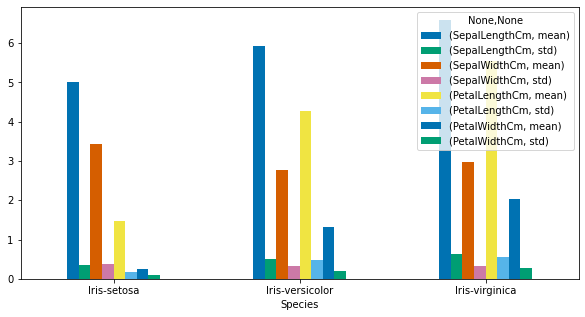

In [8]:
iris_by_label = iris_id_indexed.groupby('Species').agg(['mean', 'std'])
print(iris_by_label)
iris_by_label.plot.bar(rot = 0, figsize=(10,5));

2) display mean ± std of each feature for each label in a bar chat with error bar being ± std

                SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm
                         mean         mean          mean         mean
Species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026
                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026


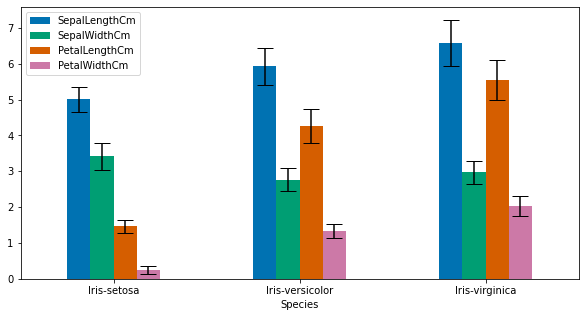

In [31]:
# idx = pd.IndexSlice
# iris_mean = iris_by_label.loc[:,idx[:,'mean']]
# iris_std = iris_by_label.loc[:,idx[:,'std']]

iris_mean = iris_by_label.loc[:, (slice(None), 'mean') ].droplevel(level=1, axis=1)
iris_std =  iris_by_label.loc[:, (slice(None), 'std') ].droplevel(level=1, axis=1)
print(iris_by_label.loc[:, (slice(None),'mean') ])
print(iris_mean)

#-- NOTE: When passing values to yerr as a dataframe, all the column 
# names must be the same as those of the data columns
# yerr=iris_std will create ± std, 
iris_mean.plot.bar(rot = 0, figsize=(10,5), yerr=iris_std, capsize=8);

3) display mean + std of each feature for each label in a stacked bar chart

                                mean       std
Species                                       
Iris-setosa     PetalLengthCm  1.464  0.173511
                PetalWidthCm   0.244  0.107210
                SepalLengthCm  5.006  0.352490
                SepalWidthCm   3.418  0.381024
Iris-versicolor PetalLengthCm  4.260  0.469911
                PetalWidthCm   1.326  0.197753
                SepalLengthCm  5.936  0.516171
                SepalWidthCm   2.770  0.313798
Iris-virginica  PetalLengthCm  5.552  0.551895
                PetalWidthCm   2.026  0.274650
                SepalLengthCm  6.588  0.635880
                SepalWidthCm   2.974  0.322497


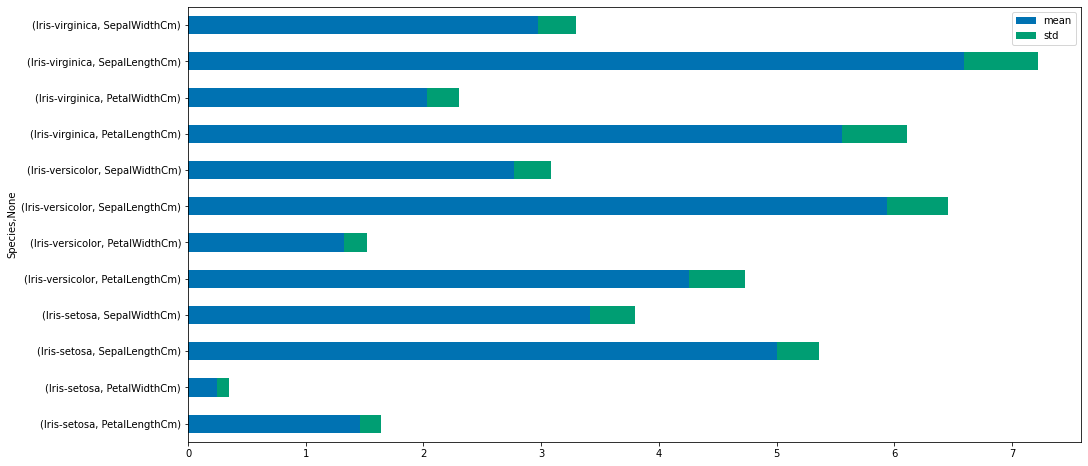

In [13]:
 # We need the legend to tell mean and std
print(iris_by_label.stack(level=0))
iris_by_label.stack(level=0).plot(kind ='barh', 
                                  rot = 0,
                                  figsize=(16,8),
                                  stacked = True);

## Seaborn

display mean ± std of each feature for each label in a bar chat with error bar being ± std

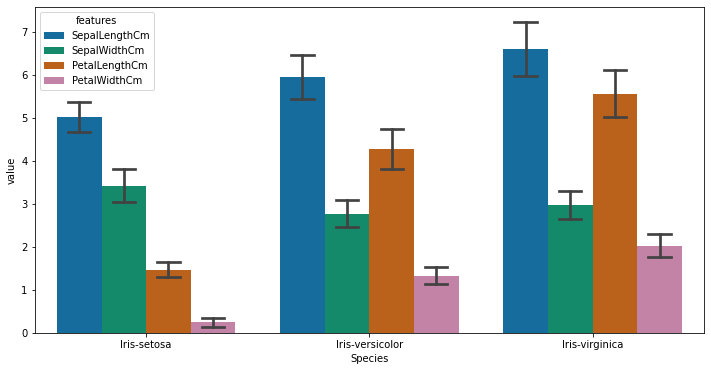

In [10]:
plt.figure(figsize=(12,6))
# If “sd”, skip bootstrapping and draw the standard deviation of the observations
# By default, the barplot() function draws error bars in the plot with 95% confidence interval.
sns.barplot(x = 'Species', y ='value', hue= 'features',
            data = iris_melt,
            ci = 'sd' , capsize=0.1); 

## Matplotlib

display mean ± std of each feature for each label in a bar chat with error bar being ± std

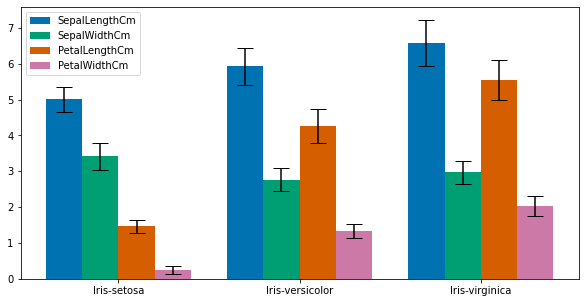

In [11]:
#- set positions of the bars
xvals =np.array(range(len(iris_mean.index)))
#- set widths of the bars
width = 0.2 

#- create one axis 
fig, ax = plt.subplots(figsize=(10,5))

#- plot bars
for i, f_str in enumerate(iris_mean): # return the column name and index
    plt.bar(x       = xvals + width * i, 
            height  = iris_mean.loc[:, f_str],
            width   = width, 
            label   = f_str, # label of the bar 
            yerr    = iris_std.loc[:, f_str], # error bar
            capsize = 8 ) # cap size of the error bar
    
#- set position for placing the labels of xticks  
ax.set_xticks(xvals + width * i /2 )
#- set labels of xticks
ax.set_xticklabels(iris_mean.index.values)
#- show the legend
plt.legend()
plt.show()

# Boxplots

Use **pandas, seaborn, matplotlib, respectively**, to create boxplots of each feature for each label. 

A boxplot includes the **interquartile range** ( the 25th to the 75th percentile, IQR), the **minimum** (Q1 -1.5\*IQR), the **lower quartile**(25th percentile, Q1), the **median**(50th percentile, Q2), the **upper quartile**(75th percentile, Q3), **the maximum** (Q3 + 1.5\*IQR)， **outliers**(points outside minimum to maximum), etc. 

![boxplots](https://miro.medium.com/max/1050/1*2c21SkzJMf3frPXPAR_gZA.png)

## Pandas

Use pandas to create boxplots of each feature for each label.

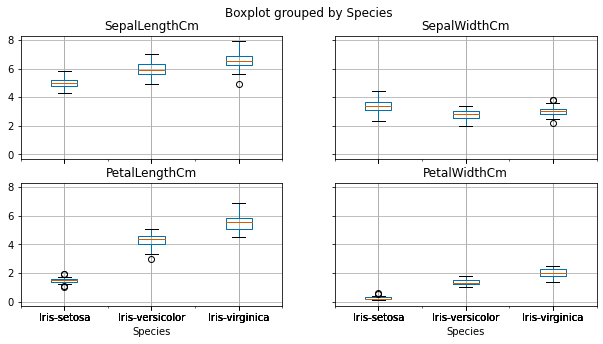

In [12]:
#  df.boxplot is different from df.plot.box(). df.boxplot is prefered due to convenience when dealing with dataframe
iris.boxplot(column =['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm'],
             by = 'Species' , 
            figsize=(10,5)); # figsize=(width,height)

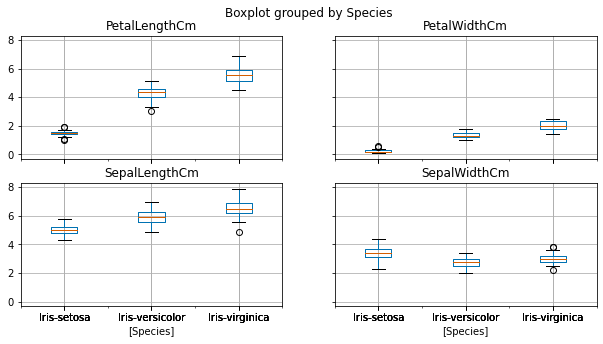

In [13]:
iris_id_indexed.boxplot(by = 'Species' , figsize=(10,5)); # figsize=(width,height)

## Seaborn

Use  seaborn to create boxplots of each feature for each label.

            Species       features  value
0       Iris-setosa  SepalLengthCm    5.1
1       Iris-setosa  SepalLengthCm    4.9
2       Iris-setosa  SepalLengthCm    4.7
3       Iris-setosa  SepalLengthCm    4.6
4       Iris-setosa  SepalLengthCm    5.0
..              ...            ...    ...
595  Iris-virginica   PetalWidthCm    2.3
596  Iris-virginica   PetalWidthCm    1.9
597  Iris-virginica   PetalWidthCm    2.0
598  Iris-virginica   PetalWidthCm    2.3
599  Iris-virginica   PetalWidthCm    1.8

[600 rows x 3 columns]


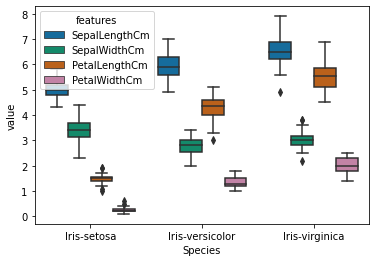

In [19]:
 # you may specify x and y and plot them in subplots by setting ax argument
print(iris_melt)
sns.boxplot(x = 'Species', y ='value', hue = 'features',data = iris_melt);

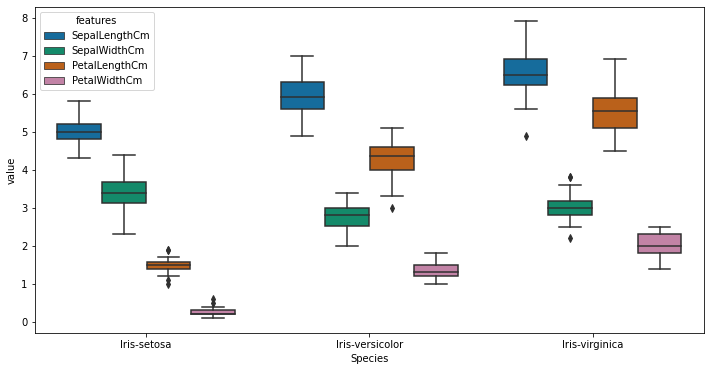

In [15]:
plt.figure(figsize=(12,6)) # set figure size 
sns.boxplot(x='Species',y='value',data=iris_melt, hue= 'features');

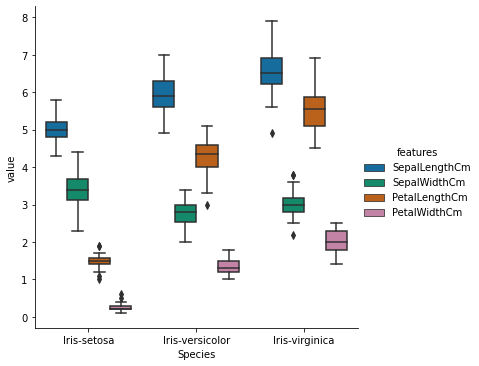

In [16]:
g = sns.catplot(x='Species',y='value', hue= 'features', data=iris_melt,
                 kind="box")

## Matplotlib

Use matplotlib to create boxplots of each feature for each label.

In [22]:
# set Species as the index
iris_label_indexed = iris.set_index(['Species']).sort_index()
# get feature names
features_str = iris_label_indexed.columns.values[1:] # exclude the 'Id'
# get label names
labels_str = np.unique(iris_label_indexed.index.values)

print(features_str)
print(labels_str)

['SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm']
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


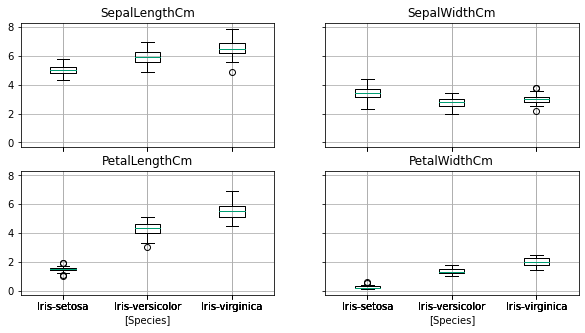

In [17]:
#- Boxplot via Matplotlib Directly 
#- indexed by labels

# set Species as the index
iris_label_indexed = iris.set_index(['Species']).sort_index()
# get feature names
features_str = iris_label_indexed.columns.values[1:] # exclude the 'Id'
# get label names
labels_str = np.unique(iris_label_indexed.index.values)

row, col = 2, 2 # subplots and share axes
fig, ax = plt.subplots(row, col, figsize=(10,5), sharex=True, sharey=True)  
ax = ax.flatten() # flateen narray ( (ax1, ax2), (ax3, ax4) )

# group data and plot result
for i, f_str in enumerate(features_str):
    data_temp = []
    for l_str in labels_str:
        data_temp.append(list(iris_label_indexed.loc[l_str,f_str])) # slice and group
        
    ax[i].boxplot(data_temp, labels = labels_str)
    ax[i].set_title(f_str)
    ax[i].grid() 

    if i >len(labels_str) - col: # col = 2 in this case #xlabel in the bottom row 
        ax[i].set_xlabel('[Species]') 
        
plt.show()


# Histogram/ Scatter Plot/ Pair Plot

Use Pandas and Seaborn to, respectively,  
1) create histograms for all features  
2) create scatter plots for `SepalLengthCm` and `SepalWidthCm`  
3) create pair plots based on iris_id_indexed dataframe

In [18]:
# iris_id_indexed = iris.set_index('Id')
iris_id_indexed.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Histogram via Pandas

create histograms for all features  

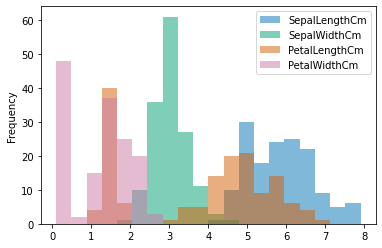

In [19]:
iris_id_indexed.plot.hist(bins=20, alpha=0.5); #  transparency of a graph, alpha=0.5

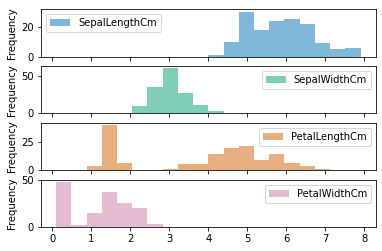

In [20]:
iris_id_indexed.plot.hist(bins=20, alpha=0.5, subplots = True);  

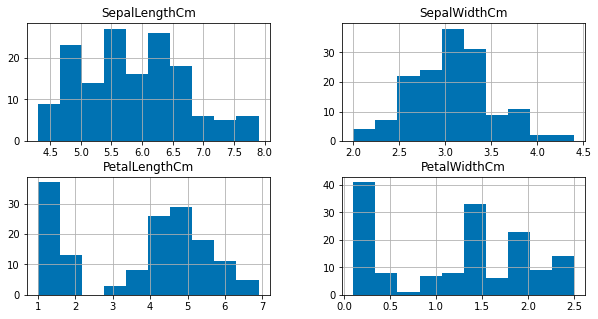

In [21]:
iris_id_indexed.hist(figsize=(10, 5));

## Histogram via Seaborn

1) create histograms for all features

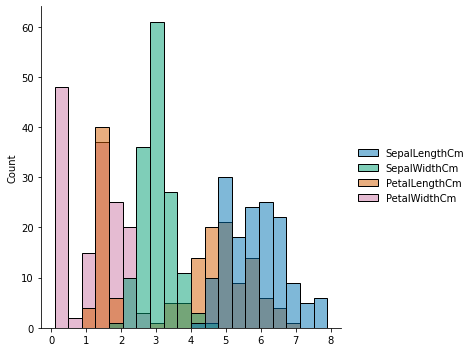

In [22]:
sns.displot(bins=20, alpha=0.5, data = iris_id_indexed); # you may use hisplot

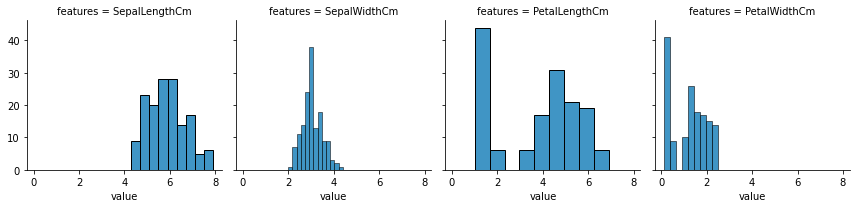

In [23]:
#-- create different axes
grid = sns.FacetGrid(iris_melt, col = 'features')  # you may change it row
#-- apply values                     
grid.map(sns.histplot, 'value');  # plt.hist can be repalced by sns.histplot

#-------------------------------------------
# By default, displot()/histplot() choose a
# default bin size based on the variance of
# the data and the number of observations. 

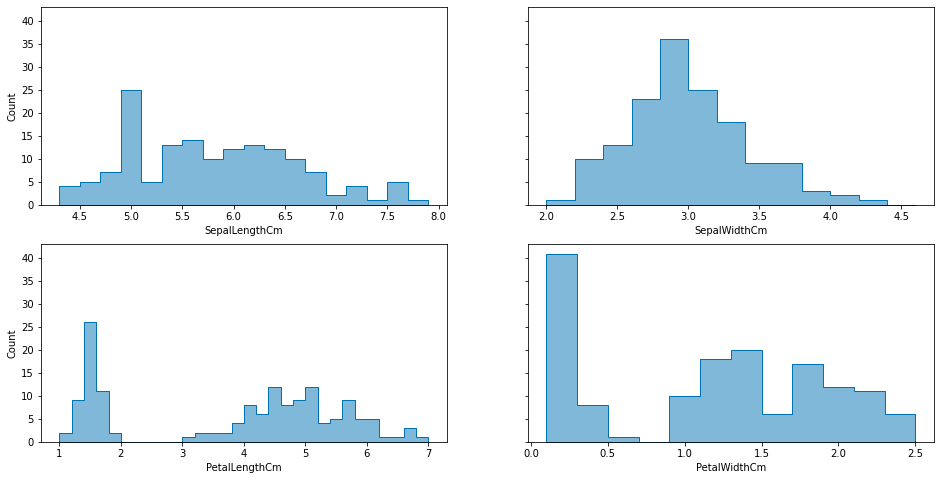

In [24]:
row, col = 2, 2 # subplots and share axes
fig, ax = plt.subplots(row, col, figsize=(16,8),  sharey=True)  
ax = ax.flatten() # flateen narray ( (ax1, ax2), (ax3, ax4) )

for i, col in enumerate(iris_id_indexed.drop('Species', axis = 1)):
    sns.histplot(x = col, binwidth=0.2, alpha=0.5, element="step",
                 data = iris_id_indexed, ax=ax[i]); 

## Scatter Plot via Pandas

2) create a scatter plot for SepalLengthCm and SepalWidthCm

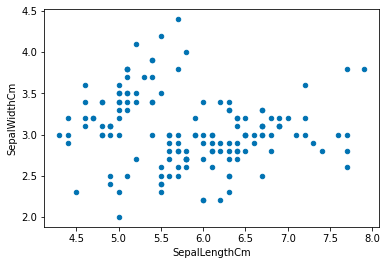

In [25]:
# you may prepare the color colunms to highlight each label, but Seaborn will do the job more easily
iris_id_indexed.plot.scatter(x = 'SepalLengthCm', y = 'SepalWidthCm'); 

## 4.1  Scatter Plot via Seaborn

2) create scatter plots for SepalLengthCm and SepalWidthCm

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

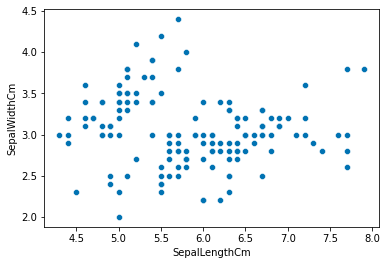

In [26]:
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = iris_id_indexed)

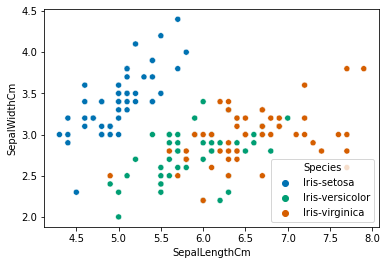

In [27]:
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = iris_id_indexed );

## Pair Plot via Pandas

3) create a pair plot based on iris_id_indexed dataframe

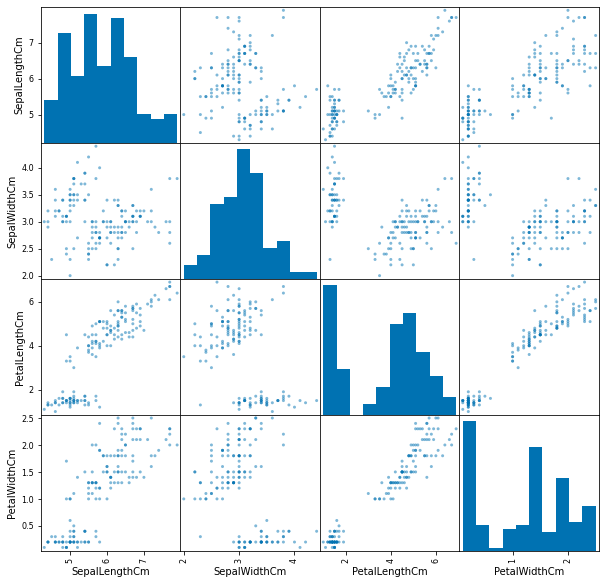

In [28]:
# Histogram plot in the diagonal by default 'hist' 
# You may change it to Kernel Density Estimation,  diagonal = 'kde',
pd.plotting.scatter_matrix(iris_id_indexed, figsize = (10, 10) )
plt.show()

##  Pair Plot via Seaborn

3) create pair plots based on iris_id_indexed dataframe

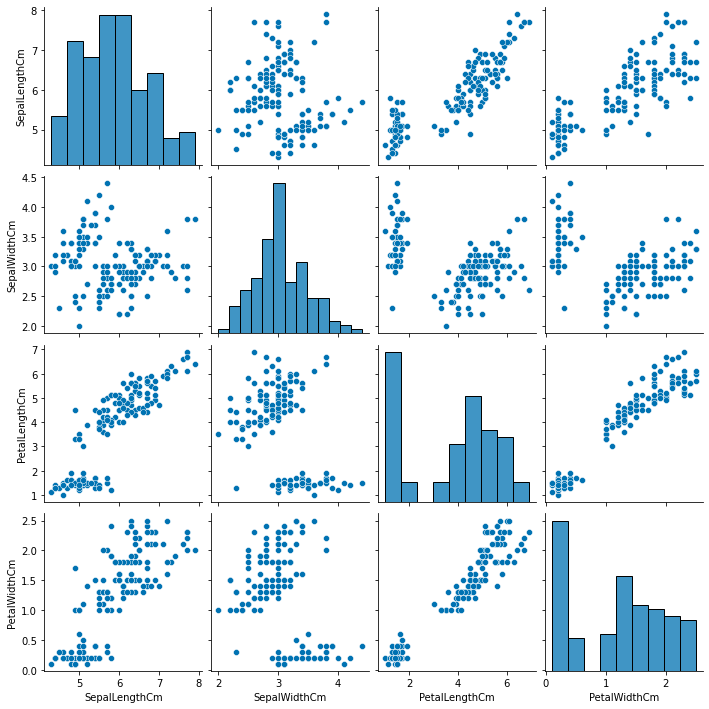

In [29]:
#-- consider all labels as a whole
sns.pairplot(iris_id_indexed); # consider only the numeric type of data

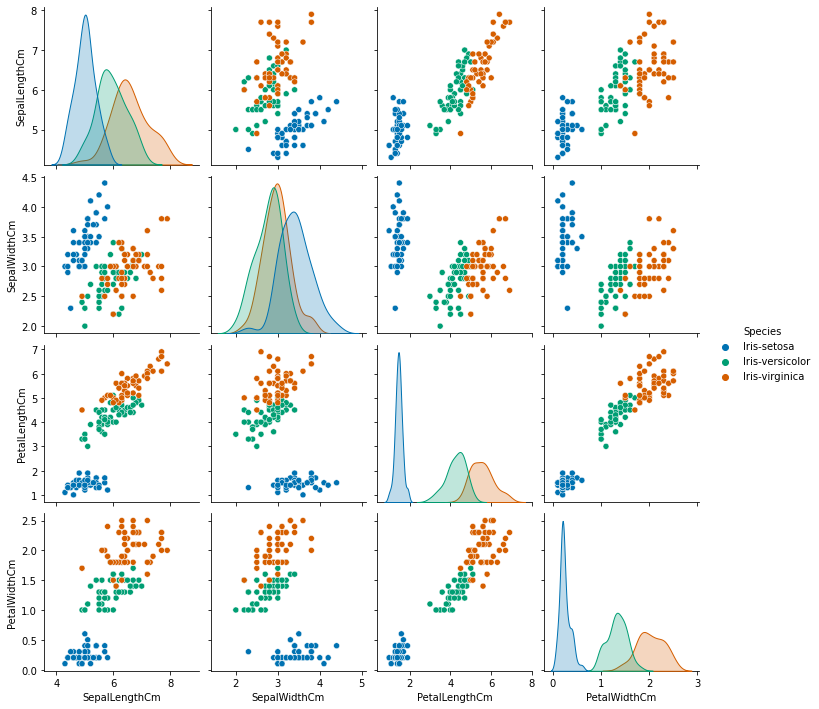

In [30]:
#-- consider labels separately
# diag_kind{'auto', 'hist', 'kde', None} , e.g.,  diag_kind = 'hist'
sns.pairplot(iris_id_indexed, hue = 'Species');

# More plots via Seaborn (Additional)

Use Seaborn to 

1) display the histogram and the density plots on the same figure for `SepalLengthCm`  
2) display the joint distribution and the marginal distribution on the same figure for `SepalLengthCm`  and `SepalWidthCm`  
3) create violin plots for `SepalLengthCm` of each label  
4) create violin plots for all the features and labels. 

## 1) 
display the histogram and the density plots on the same figure for SepalLengthCm

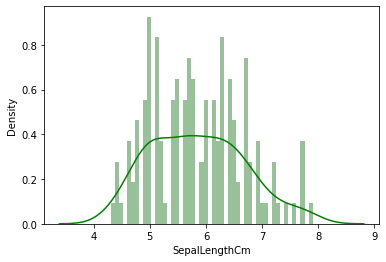

In [31]:
sns.distplot(iris['SepalLengthCm'], bins = 50, hist_kws={'color': 'darkgreen'},
             kde_kws={'color': 'green'});

## 2) 
display the joint distribution and the marginal distribution on the same figure for `SepalLengthCm`  and `SepalWidthCm` 

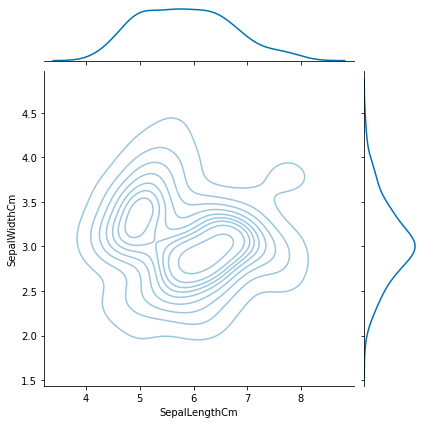

In [32]:
sns.jointplot(x = 'SepalLengthCm',
              y = 'SepalWidthCm',
              data = iris, alpha=0.4, kind='kde');

## 3) 
create violin plots for SepalLengthCm of each label

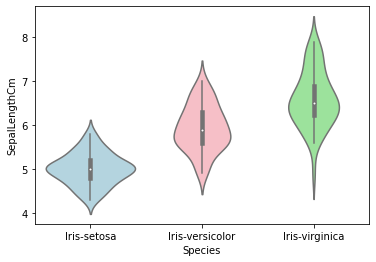

In [33]:
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data=iris,
               palette=['lightblue', 'lightpink', 'lightgreen']);

## 4) 
create violin plots for all the features and labels.

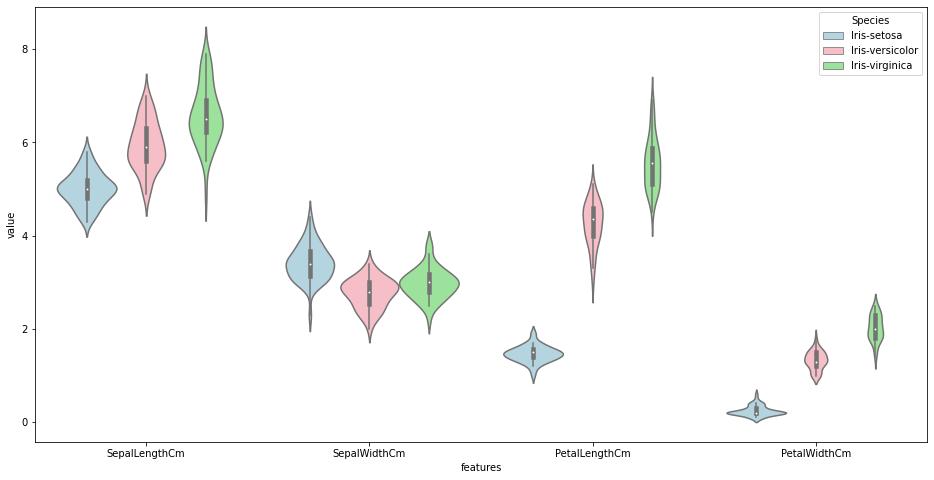

In [34]:
plt.figure(figsize=(16, 8))
sns.violinplot(x = 'features', y = 'value', hue = 'Species',  data=iris_melt,
               palette=['lightblue', 'lightpink', 'lightgreen']);